In [4]:
from __future__ import absolute_import ,division, print_function, unicode_literals

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

1.13.1


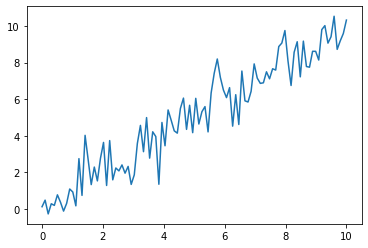

In [2]:
x = np.linspace(0, 10, 100)
y = x + np.random.randn(100)

plt.plot(x, y, label="test")
plt.show()

# finance chart classifier

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

 8192/29515 [=======>......................] - ETA: 0s

32768/29515 [=================================] - 0s 0us/step


    8192/26421880 [..............................] - ETA: 1s

  589824/26421880 [..............................] - ETA: 2s

 1163264/26421880 [>.............................] - ETA: 2s

 1720320/26421880 [>.............................] - ETA: 2s

 2359296/26421880 [=>............................] - ETA: 2s

 2949120/26421880 [==>...........................] - ETA: 2s

 3555328/26421880 [===>..........................] - ETA: 1s

 4177920/26421880 [===>..........................] - ETA: 1s

 4202496/26421880 [===>..........................] - ETA: 2s

 4734976/26421880 [====>.........................] - ETA: 2s

 5201920/26421880 [====>.........................] - ETA: 2s

 5726208/26421880 [=====>........................] - ETA: 2s

 6168576/26421880 [======>.......................] - ETA: 2s

 6676480/26421880 [======>.......................] - ETA: 2s

 7102464/26421880 [=======>......................] - ETA: 2s

 7561216/26421880 [=======>......................] - ETA: 2s

 8019968/26421880 [========>.....................] - ETA: 2s

 8478720/26421880 [========>.....................] - ETA: 2s

 9003008/26421880 [=========>....................] - ETA: 2s

 9494528/26421880 [=========>....................] - ETA: 1s

 9986048/26421880 [==========>...................] - ETA: 1s

10461184/26421880 [==========>...................] - ETA: 1s

10969088/26421880 [===========>..................] - ETA: 1s

11444224/26421880 [===========>..................] - ETA: 1s

12050432/26421880 [============>.................] - ETA: 1s

12640256/26421880 [=============>................] - ETA: 1s

13262848/26421880 [==============>...............] - ETA: 1s

13852672/26421880 [==============>...............] - ETA: 1s

14442496/26421880 [===============>..............] - ETA: 1s

15081472/26421880 [================>.............] - ETA: 1s

15671296/26421880 [================>.............] - ETA: 1s

16310272/26421880 [=================>............] - ETA: 1s

16916480/26421880 [==================>...........] - ETA: 0s

17489920/26421880 [==================>...........] - ETA: 0s

18079744/26421880 [===================>..........] - ETA: 0s

18685952/26421880 [====================>.........] - ETA: 0s

19308544/26421880 [====================>.........] - ETA: 0s

19865600/26421880 [=====================>........] - ETA: 0s

20488192/26421880 [======================>.......] - ETA: 0s

21078016/26421880 [======================>.......] - ETA: 0s

21667840/26421880 [=======================>......] - ETA: 0s

22249472/26421880 [========================>.....] - ETA: 0s

22831104/26421880 [========================>.....] - ETA: 0s

23437312/26421880 [=========================>....] - ETA: 0s

24027136/26421880 [==========================>...] - ETA: 0s

24584192/26421880 [==========================>...] - ETA: 0s

25206784/26421880 [===========================>..] - ETA: 0s

25812992/26421880 [============================>.] - ETA: 0s

26427392/26421880 [==============================] - 3s 0us/step


8192/5148 [===============================================] - 0s 1us/step


   8192/4422102 [..............................] - ETA: 0s

 516096/4422102 [==>...........................] - ETA: 0s

1138688/4422102 [======>.......................] - ETA: 0s

1728512/4422102 [==========>...................] - ETA: 0s

2301952/4422102 [==============>...............] - ETA: 0s

2891776/4422102 [==================>...........] - ETA: 0s

3514368/4422102 [======================>.......] - ETA: 0s

4104192/4422102 [==========================>...] - ETA: 0s

4415488/4422102 [============================>.] - ETA: 0s

4423680/4422102 [==============================] - 1s 0us/step


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_images.shape


(10000, 28, 28)

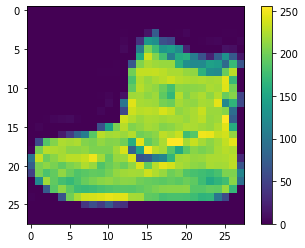

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)
plt.show()

## normalize data
ニューラルネットワークにデータを投入する前に、これらの値を0から1までの範囲にスケールします。そのためには、画素の値を255で割ります。
訓練用データセットとテスト用データセットは、同じように前処理することが重要。

In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

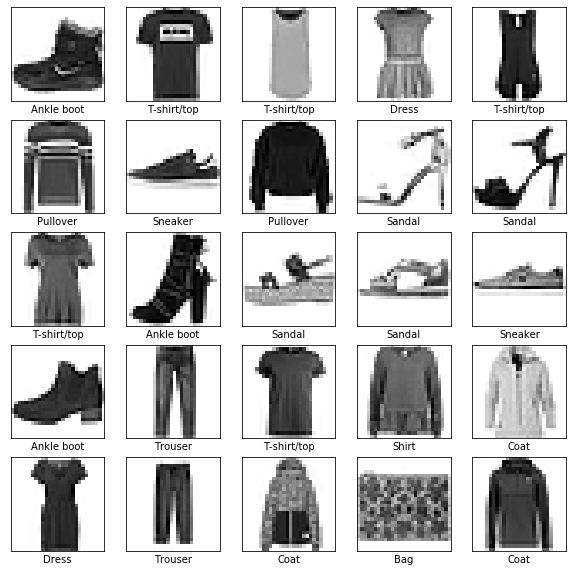

In [14]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [18]:
model.fit(train_images, train_labels, epochs=5)

37856/60000 [=================>............] - ETA: 2s - loss: 0.3831 - acc: 0.8624

38144/60000 [==================>...........] - ETA: 2s - loss: 0.3828 - acc: 0.8626

38720/60000 [==================>...........] - ETA: 2s - loss: 0.3820 - acc: 0.8629

39296/60000 [==================>...........] - ETA: 2s - loss: 0.3820 - acc: 0.8630

39840/60000 [==================>...........] - ETA: 2s - loss: 0.3821 - acc: 0.8629

40224/60000 [===================>..........] - ETA: 2s - loss: 0.3817 - acc: 0.8630

40608/60000 [===================>..........] - ETA: 1s - loss: 0.3811 - acc: 0.8631

40928/60000 [===================>..........] - ETA: 1s - loss: 0.3808 - acc: 0.8630

41056/60000 [===================>..........] - ETA: 1s - loss: 0.3807 - acc: 0.8629

41152/60000 [===================>..........] - ETA: 1s - loss: 0.3808 - acc: 0.8628

41568/60000 [===================>..........] - ETA: 1s - loss: 0.3815 - acc: 0.8625

41984/60000 [===================>..........] - ETA: 1s - loss: 0.3815 - acc: 0.8625

42336/60000 [====================>.........] - ETA: 1s - loss: 0.3812 - acc: 0.8625

42752/60000 [====================>.........] - ETA: 1s - loss: 0.3809 - acc: 0.8625

43104/60000 [====================>.........] - ETA: 1s - loss: 0.3811 - acc: 0.8624

43424/60000 [====================>.........] - ETA: 1s - loss: 0.3808 - acc: 0.8626

43680/60000 [====================>.........] - ETA: 1s - loss: 0.3805 - acc: 0.8627

44128/60000 [=====================>........] - ETA: 1s - loss: 0.3800 - acc: 0.8628

44640/60000 [=====================>........] - ETA: 1s - loss: 0.3799 - acc: 0.8626

45184/60000 [=====================>........] - ETA: 1s - loss: 0.3799 - acc: 0.8625

45760/60000 [=====================>........] - ETA: 1s - loss: 0.3795 - acc: 0.8628

46112/60000 [======================>.......] - ETA: 1s - loss: 0.3795 - acc: 0.8628

46592/60000 [======================>.......] - ETA: 1s - loss: 0.3791 - acc: 0.8630

46976/60000 [======================>.......] - ETA: 1s - loss: 0.3788 - acc: 0.8631

47392/60000 [======================>.......] - ETA: 1s - loss: 0.3786 - acc: 0.8630

47744/60000 [======================>.......] - ETA: 1s - loss: 0.3790 - acc: 0.8628

48096/60000 [=======================>......] - ETA: 1s - loss: 0.3786 - acc: 0.8631

48512/60000 [=======================>......] - ETA: 1s - loss: 0.3784 - acc: 0.8633

48896/60000 [=======================>......] - ETA: 1s - loss: 0.3780 - acc: 0.8635

49248/60000 [=======================>......] - ETA: 1s - loss: 0.3776 - acc: 0.8636

49632/60000 [=======================>......] - ETA: 1s - loss: 0.3769 - acc: 0.8639

50112/60000 [========================>.....] - ETA: 1s - loss: 0.3768 - acc: 0.8639

50656/60000 [========================>.....] - ETA: 1s - loss: 0.3765 - acc: 0.8639

51200/60000 [========================>.....] - ETA: 0s - loss: 0.3766 - acc: 0.8638

51808/60000 [========================>.....] - ETA: 0s - loss: 0.3766 - acc: 0.8637

52416/60000 [=========================>....] - ETA: 0s - loss: 0.3765 - acc: 0.8637

52672/60000 [=========================>....] - ETA: 0s - loss: 0.3763 - acc: 0.8637

53120/60000 [=========================>....] - ETA: 0s - loss: 0.3762 - acc: 0.8639

53696/60000 [=========================>....] - ETA: 0s - loss: 0.3765 - acc: 0.8637

54208/60000 [==========================>...] - ETA: 0s - loss: 0.3762 - acc: 0.8638

54688/60000 [==========================>...] - ETA: 0s - loss: 0.3758 - acc: 0.8641

55232/60000 [==========================>...] - ETA: 0s - loss: 0.3753 - acc: 0.8643

55712/60000 [==========================>...] - ETA: 0s - loss: 0.3748 - acc: 0.8644

56256/60000 [===========================>..] - ETA: 0s - loss: 0.3744 - acc: 0.8645

56768/60000 [===========================>..] - ETA: 0s - loss: 0.3748 - acc: 0.8644

57280/60000 [===========================>..] - ETA: 0s - loss: 0.3744 - acc: 0.8645

57824/60000 [===========================>..] - ETA: 0s - loss: 0.3744 - acc: 0.8644

58400/60000 [============================>.] - ETA: 0s - loss: 0.3747 - acc: 0.8642

58944/60000 [============================>.] - ETA: 0s - loss: 0.3743 - acc: 0.8644

59488/60000 [============================>.] - ETA: 0s - loss: 0.3745 - acc: 0.8644

60000/60000 [==============================] - 6s 108us/sample - loss: 0.3747 - acc: 0.8643


Epoch 3/5
   32/60000 [..............................] - ETA: 11s - loss: 0.3514 - acc: 0.8438

  608/60000 [..............................] - ETA: 5s - loss: 0.3224 - acc: 0.8898 

 1184/60000 [..............................] - ETA: 5s - loss: 0.3481 - acc: 0.8742

 1760/60000 [..............................] - ETA: 5s - loss: 0.3418 - acc: 0.8795

 2368/60000 [>.............................] - ETA: 5s - loss: 0.3502 - acc: 0.8775

 2912/60000 [>.............................] - ETA: 5s - loss: 0.3583 - acc: 0.8743

 3520/60000 [>.............................] - ETA: 5s - loss: 0.3559 - acc: 0.8753

 4128/60000 [=>............................] - ETA: 5s - loss: 0.3524 - acc: 0.8781

 4704/60000 [=>............................] - ETA: 4s - loss: 0.3481 - acc: 0.8778

 5248/60000 [=>............................] - ETA: 4s - loss: 0.3516 - acc: 0.8767

 5856/60000 [=>............................] - ETA: 4s - loss: 0.3476 - acc: 0.8782

 6432/60000 [==>...........................] - ETA: 4s - loss: 0.3483 - acc: 0.8776

 7040/60000 [==>...........................] - ETA: 4s - loss: 0.3471 - acc: 0.8781

 7648/60000 [==>...........................] - ETA: 4s - loss: 0.3469 - acc: 0.8776

 8288/60000 [===>..........................] - ETA: 4s - loss: 0.3496 - acc: 0.8758

 8800/60000 [===>..........................] - ETA: 4s - loss: 0.3482 - acc: 0.8773

 9344/60000 [===>..........................] - ETA: 4s - loss: 0.3488 - acc: 0.8764

 9888/60000 [===>..........................] - ETA: 4s - loss: 0.3503 - acc: 0.8756

10432/60000 [====>.........................] - ETA: 4s - loss: 0.3473 - acc: 0.8769

10976/60000 [====>.........................] - ETA: 4s - loss: 0.3455 - acc: 0.8770

11392/60000 [====>.........................] - ETA: 4s - loss: 0.3467 - acc: 0.8767

11968/60000 [====>.........................] - ETA: 4s - loss: 0.3464 - acc: 0.8771

12576/60000 [=====>........................] - ETA: 4s - loss: 0.3461 - acc: 0.8767

13184/60000 [=====>........................] - ETA: 4s - loss: 0.3454 - acc: 0.8766

13792/60000 [=====>........................] - ETA: 4s - loss: 0.3461 - acc: 0.8765

14400/60000 [======>.......................] - ETA: 4s - loss: 0.3460 - acc: 0.8765

14976/60000 [======>.......................] - ETA: 4s - loss: 0.3480 - acc: 0.8761

15584/60000 [======>.......................] - ETA: 3s - loss: 0.3440 - acc: 0.8776

16192/60000 [=======>......................] - ETA: 3s - loss: 0.3446 - acc: 0.8772

16768/60000 [=======>......................] - ETA: 3s - loss: 0.3436 - acc: 0.8773

17344/60000 [=======>......................] - ETA: 3s - loss: 0.3450 - acc: 0.8768

17952/60000 [=======>......................] - ETA: 3s - loss: 0.3458 - acc: 0.8765

18528/60000 [========>.....................] - ETA: 3s - loss: 0.3443 - acc: 0.8773

19136/60000 [========>.....................] - ETA: 3s - loss: 0.3422 - acc: 0.8783

19744/60000 [========>.....................] - ETA: 3s - loss: 0.3413 - acc: 0.8785

20352/60000 [=========>....................] - ETA: 3s - loss: 0.3399 - acc: 0.8789

20896/60000 [=========>....................] - ETA: 3s - loss: 0.3397 - acc: 0.8790

21312/60000 [=========>....................] - ETA: 3s - loss: 0.3386 - acc: 0.8793

21824/60000 [=========>....................] - ETA: 3s - loss: 0.3399 - acc: 0.8790

22368/60000 [==========>...................] - ETA: 3s - loss: 0.3390 - acc: 0.8788

22912/60000 [==========>...................] - ETA: 3s - loss: 0.3394 - acc: 0.8785

23296/60000 [==========>...................] - ETA: 3s - loss: 0.3386 - acc: 0.8789

23776/60000 [==========>...................] - ETA: 3s - loss: 0.3389 - acc: 0.8786

24384/60000 [===========>..................] - ETA: 3s - loss: 0.3395 - acc: 0.8784

24960/60000 [===========>..................] - ETA: 3s - loss: 0.3396 - acc: 0.8783

25536/60000 [===========>..................] - ETA: 3s - loss: 0.3401 - acc: 0.8781

26144/60000 [============>.................] - ETA: 3s - loss: 0.3408 - acc: 0.8778

26752/60000 [============>.................] - ETA: 3s - loss: 0.3413 - acc: 0.8773

27360/60000 [============>.................] - ETA: 2s - loss: 0.3411 - acc: 0.8773

27968/60000 [============>.................] - ETA: 2s - loss: 0.3418 - acc: 0.8764

28512/60000 [=============>................] - ETA: 2s - loss: 0.3421 - acc: 0.8764

29120/60000 [=============>................] - ETA: 2s - loss: 0.3416 - acc: 0.8765

29696/60000 [=============>................] - ETA: 2s - loss: 0.3414 - acc: 0.8765

30272/60000 [==============>...............] - ETA: 2s - loss: 0.3402 - acc: 0.8769

30816/60000 [==============>...............] - ETA: 2s - loss: 0.3400 - acc: 0.8769

31232/60000 [==============>...............] - ETA: 2s - loss: 0.3398 - acc: 0.8769

31808/60000 [==============>...............] - ETA: 2s - loss: 0.3397 - acc: 0.8766

32320/60000 [===============>..............] - ETA: 2s - loss: 0.3396 - acc: 0.8765

32896/60000 [===============>..............] - ETA: 2s - loss: 0.3391 - acc: 0.8766

33440/60000 [===============>..............] - ETA: 2s - loss: 0.3404 - acc: 0.8763

33888/60000 [===============>..............] - ETA: 2s - loss: 0.3410 - acc: 0.8761

34432/60000 [================>.............] - ETA: 2s - loss: 0.3405 - acc: 0.8763

35072/60000 [================>.............] - ETA: 2s - loss: 0.3397 - acc: 0.8765

35648/60000 [================>.............] - ETA: 2s - loss: 0.3400 - acc: 0.8767

36256/60000 [=================>............] - ETA: 2s - loss: 0.3409 - acc: 0.8763

36864/60000 [=================>............] - ETA: 2s - loss: 0.3414 - acc: 0.8761

37472/60000 [=================>............] - ETA: 2s - loss: 0.3420 - acc: 0.8758

38080/60000 [==================>...........] - ETA: 1s - loss: 0.3411 - acc: 0.8760

38656/60000 [==================>...........] - ETA: 1s - loss: 0.3405 - acc: 0.8762

39296/60000 [==================>...........] - ETA: 1s - loss: 0.3407 - acc: 0.8761

39808/60000 [==================>...........] - ETA: 1s - loss: 0.3404 - acc: 0.8762

40384/60000 [===================>..........] - ETA: 1s - loss: 0.3397 - acc: 0.8764

40992/60000 [===================>..........] - ETA: 1s - loss: 0.3389 - acc: 0.8767

41600/60000 [===================>..........] - ETA: 1s - loss: 0.3393 - acc: 0.8766

42208/60000 [====================>.........] - ETA: 1s - loss: 0.3389 - acc: 0.8766

42752/60000 [====================>.........] - ETA: 1s - loss: 0.3389 - acc: 0.8764

43232/60000 [====================>.........] - ETA: 1s - loss: 0.3390 - acc: 0.8763

43808/60000 [====================>.........]

 - ETA: 1s - loss: 0.3391 - acc: 0.8763

44352/60000 [=====================>........] - ETA: 1s - loss: 0.3393 - acc: 0.8763

44864/60000 [=====================>........] - ETA: 1s - loss: 0.3398 - acc: 0.8761

45408/60000 [=====================>........] - ETA: 1s - loss: 0.3401 - acc: 0.8761

46016/60000 [======================>.......] - ETA: 1s - loss: 0.3403 - acc: 0.8760

46624/60000 [======================>.......] - ETA: 1s - loss: 0.3403 - acc: 0.8761

47200/60000 [======================>.......] - ETA: 1s - loss: 0.3402 - acc: 0.8761

47744/60000 [======================>.......] - ETA: 1s - loss: 0.3400 - acc: 0.8761

48352/60000 [=======================>......] - ETA: 1s - loss: 0.3400 - acc: 0.8762

48928/60000 [=======================>......] - ETA: 1s - loss: 0.3398 - acc: 0.8763

49536/60000 [=======================>......] - ETA: 0s - loss: 0.3405 - acc: 0.8762

50144/60000 [========================>.....] - ETA: 0s - loss: 0.3417 - acc: 0.8758

50688/60000 [========================>.....] - ETA: 0s - loss: 0.3410 - acc: 0.8760

51296/60000 [========================>.....] - ETA: 0s - loss: 0.3409 - acc: 0.8760

51872/60000 [========================>.....] - ETA: 0s - loss: 0.3408 - acc: 0.8761

52416/60000 [=========================>....] - ETA: 0s - loss: 0.3404 - acc: 0.8761

53024/60000 [=========================>....] - ETA: 0s - loss: 0.3400 - acc: 0.8762

53536/60000 [=========================>....] - ETA: 0s - loss: 0.3401 - acc: 0.8763

54048/60000 [==========================>...] - ETA: 0s - loss: 0.3401 - acc: 0.8762

54624/60000 [==========================>...] - ETA: 0s - loss: 0.3397 - acc: 0.8765

55104/60000 [==========================>...] - ETA: 0s - loss: 0.3395 - acc: 0.8765

55680/60000 [==========================>...] - ETA: 0s - loss: 0.3393 - acc: 0.8766

56160/60000 [===========================>..] - ETA: 0s - loss: 0.3394 - acc: 0.8766

56736/60000 [===========================>..] - ETA: 0s - loss: 0.3393 - acc: 0.8767

57312/60000 [===========================>..] - ETA: 0s - loss: 0.3393 - acc: 0.8766

57760/60000 [===========================>..] - ETA: 0s - loss: 0.3393 - acc: 0.8766

58304/60000 [============================>.] - ETA: 0s - loss: 0.3397 - acc: 0.8762

58848/60000 [============================>.] - ETA: 0s - loss: 0.3390 - acc: 0.8765

59392/60000 [============================>.] - ETA: 0s - loss: 0.3390 - acc: 0.8763

59968/60000 [============================>.] - ETA: 0s - loss: 0.3389 - acc: 0.8765

60000/60000 [==============================] - 5s 91us/sample - loss: 0.3389 - acc: 0.8764


Epoch 4/5
   32/60000 [..............................] - ETA: 11s - loss: 0.3002 - acc: 0.8750

  608/60000 [..............................] - ETA: 5s - loss: 0.3079 - acc: 0.8898 

 1088/60000 [..............................] - ETA: 5s - loss: 0.3076 - acc: 0.8842

 1696/60000 [..............................] - ETA: 5s - loss: 0.3110 - acc: 0.8921

 2272/60000 [>.............................] - ETA: 5s - loss: 0.3084 - acc: 0.8895

 2848/60000 [>.............................] - ETA: 5s - loss: 0.3135 - acc: 0.8866

 3424/60000 [>.............................] - ETA: 5s - loss: 0.3124 - acc: 0.8855

 3936/60000 [>.............................] - ETA: 5s - loss: 0.3059 - acc: 0.8877

 4512/60000 [=>............................] - ETA: 5s - loss: 0.3057 - acc: 0.8887

 5056/60000 [=>............................] - ETA: 5s - loss: 0.3096 - acc: 0.8881

 5600/60000 [=>............................] - ETA: 5s - loss: 0.3119 - acc: 0.8880

 6208/60000 [==>...........................] - ETA: 4s - loss: 0.3106 - acc: 0.8874

 6688/60000 [==>...........................] - ETA: 4s - loss: 0.3124 - acc: 0.8867

 7264/60000 [==>...........................] - ETA: 4s - loss: 0.3163 - acc: 0.8848

 7840/60000 [==>...........................] - ETA: 4s - loss: 0.3142 - acc: 0.8857

 8384/60000 [===>..........................] - ETA: 4s - loss: 0.3170 - acc: 0.8850

 8960/60000 [===>..........................] - ETA: 4s - loss: 0.3149 - acc: 0.8857

 9536/60000 [===>..........................] - ETA: 4s - loss: 0.3153 - acc: 0.8859

10080/60000 [====>.........................] - ETA: 4s - loss: 0.3170 - acc: 0.8854

10656/60000 [====>.........................] - ETA: 4s - loss: 0.3152 - acc: 0.8864

11200/60000 [====>.........................] - ETA: 4s - loss: 0.3150 - acc: 0.8862

11744/60000 [====>.........................] - ETA: 4s - loss: 0.3148 - acc: 0.8857

12288/60000 [=====>........................] - ETA: 4s - loss: 0.3156 - acc: 0.8846

12800/60000 [=====>........................] - ETA: 4s - loss: 0.3177 - acc: 0.8841

13344/60000 [=====>........................] - ETA: 4s - loss: 0.3211 - acc: 0.8833

13888/60000 [=====>........................] - ETA: 4s - loss: 0.3204 - acc: 0.8828

14432/60000 [======>.......................] - ETA: 4s - loss: 0.3193 - acc: 0.8832

14848/60000 [======>.......................] - ETA: 4s - loss: 0.3196 - acc: 0.8834

15264/60000 [======>.......................] - ETA: 4s - loss: 0.3205 - acc: 0.8829

15712/60000 [======>.......................] - ETA: 4s - loss: 0.3193 - acc: 0.8833

16224/60000 [=======>......................] - ETA: 4s - loss: 0.3189 - acc: 0.8835

16704/60000 [=======>......................] - ETA: 4s - loss: 0.3180 - acc: 0.8835

17184/60000 [=======>......................] - ETA: 4s - loss: 0.3165 - acc: 0.8840

17664/60000 [=======>......................] - ETA: 4s - loss: 0.3171 - acc: 0.8839

18176/60000 [========>.....................] - ETA: 4s - loss: 0.3175 - acc: 0.8833

18592/60000 [========>.....................] - ETA: 4s - loss: 0.3163 - acc: 0.8838

19008/60000 [========>.....................] - ETA: 4s - loss: 0.3165 - acc: 0.8835

19456/60000 [========>.....................] - ETA: 3s - loss: 0.3161 - acc: 0.8836

19936/60000 [========>.....................] - ETA: 3s - loss: 0.3164 - acc: 0.8834

20416/60000 [=========>....................] - ETA: 3s - loss: 0.3159 - acc: 0.8837

20896/60000 [=========>....................] - ETA: 3s - loss: 0.3159 - acc: 0.8838

21088/60000 [=========>....................] - ETA: 3s - loss: 0.3153 - acc: 0.8840

21472/60000 [=========>....................] - ETA: 3s - loss: 0.3144 - acc: 0.8842

21792/60000 [=========>....................] - ETA: 3s - loss: 0.3144 - acc: 0.8842

22080/60000 [==========>...................] - ETA: 3s - loss: 0.3136 - acc: 0.8843

22400/60000 [==========>...................] - ETA: 3s - loss: 0.3140 - acc: 0.8839

22752/60000 [==========>...................] - ETA: 3s - loss: 0.3142 - acc: 0.8838

23104/60000 [==========>...................] - ETA: 3s - loss: 0.3132 - acc: 0.8844

23520/60000 [==========>...................] - ETA: 3s - loss: 0.3133 - acc: 0.8843

23936/60000 [==========>...................] - ETA: 3s - loss: 0.3137 - acc: 0.8842

24384/60000 [===========>..................] - ETA: 3s - loss: 0.3128 - acc: 0.8843

24864/60000 [===========>..................] - ETA: 3s - loss: 0.3123 - acc: 0.8844

25376/60000 [===========>..................] - ETA: 3s - loss: 0.3129 - acc: 0.8841

25920/60000 [===========>..................] - ETA: 3s - loss: 0.3127 - acc: 0.8837

26432/60000 [============>.................] - ETA: 3s - loss: 0.3130 - acc: 0.8839

26976/60000 [============>.................] - ETA: 3s - loss: 0.3123 - acc: 0.8842

27584/60000 [============>.................] - ETA: 3s - loss: 0.3125 - acc: 0.8847

28096/60000 [=============>................] - ETA: 3s - loss: 0.3120 - acc: 0.8848

28672/60000 [=============>................] - ETA: 3s - loss: 0.3119 - acc: 0.8850

29248/60000 [=============>................] - ETA: 3s - loss: 0.3114 - acc: 0.8849

29824/60000 [=============>................] - ETA: 3s - loss: 0.3116 - acc: 0.8851

30400/60000 [==============>...............] - ETA: 3s - loss: 0.3107 - acc: 0.8853

30976/60000 [==============>...............] - ETA: 3s - loss: 0.3103 - acc: 0.8856

31488/60000 [==============>...............] - ETA: 2s - loss: 0.3099 - acc: 0.8858

32032/60000 [===============>..............] - ETA: 2s - loss: 0.3103 - acc: 0.8858

32512/60000 [===============>..............] - ETA: 2s - loss: 0.3105 - acc: 0.8860

33088/60000 [===============>..............] - ETA: 2s - loss: 0.3107 - acc: 0.8859

33632/60000 [===============>..............] - ETA: 2s - loss: 0.3109 - acc: 0.8859

34144/60000 [================>.............] - ETA: 2s - loss: 0.3094 - acc: 0.8865

34656/60000 [================>.............] - ETA: 2s - loss: 0.3094 - acc: 0.8864

35040/60000 [================>.............] - ETA: 2s - loss: 0.3092 - acc: 0.8865

35520/60000 [================>.............] - ETA: 2s - loss: 0.3100 - acc: 0.8863

36096/60000 [=================>............] - ETA: 2s - loss: 0.3101 - acc: 0.8866

36672/60000 [=================>............] - ETA: 2s - loss: 0.3106 - acc: 0.8863

37152/60000 [=================>............] - ETA: 2s - loss: 0.3109 - acc: 0.8862

37440/60000 [=================>............] - ETA: 2s - loss: 0.3109 - acc: 0.8863

37920/60000 [=================>............] - ETA: 2s - loss: 0.3102 - acc: 0.8867

38496/60000 [==================>...........] - ETA: 2s - loss: 0.3092 - acc: 0.8871

39072/60000 [==================>...........] - ETA: 2s - loss: 0.3093 - acc: 0.8873

39648/60000 [==================>...........] - ETA: 2s - loss: 0.3091 - acc: 0.8872

40224/60000 [===================>..........] - ETA: 2s - loss: 0.3087 - acc: 0.8873

40800/60000 [===================>..........] - ETA: 1s - loss: 0.3091 - acc: 0.8872

41344/60000 [===================>..........] - ETA: 1s - loss: 0.3098 - acc: 0.8871

41920/60000 [===================>..........] - ETA: 1s - loss: 0.3097 - acc: 0.8871

42432/60000 [====================>.........] - ETA: 1s - loss: 0.3091 - acc: 0.8873

43008/60000 [====================>.........] - ETA: 1s - loss: 0.3089 - acc: 0.8873

43520/60000 [====================>.........] - ETA: 1s - loss: 0.3087 - acc: 0.8873

44032/60000 [=====================>........] - ETA: 1s - loss: 0.3082 - acc: 0.8874

44544/60000 [=====================>........] - ETA: 1s - loss: 0.3091 - acc: 0.8872

44960/60000 [=====================>........] - ETA: 1s - loss: 0.3093 - acc: 0.8871

45504/60000 [=====================>........] - ETA: 1s - loss: 0.3094 - acc: 0.8870

46016/60000 [======================>.......] - ETA: 1s - loss: 0.3099 - acc: 0.8869

46528/60000 [======================>.......] - ETA: 1s - loss: 0.3096 - acc: 0.8870

47040/60000 [======================>.......] - ETA: 1s - loss: 0.3096 - acc: 0.8869

47584/60000 [======================>.......] - ETA: 1s - loss: 0.3092 - acc: 0.8871

48096/60000 [=======================>......] - ETA: 1s - loss: 0.3087 - acc: 0.8874

48672/60000 [=======================>......] - ETA: 1s - loss: 0.3091 - acc: 0.8873

49216/60000 [=======================>......] - ETA: 1s - loss: 0.3088 - acc: 0.8875

49792/60000 [=======================>......] - ETA: 1s - loss: 0.3087 - acc: 0.8876

50336/60000 [========================>.....] - ETA: 0s - loss: 0.3083 - acc: 0.8877

50912/60000 [========================>.....] - ETA: 0s - loss: 0.3090 - acc: 0.8876

51488/60000 [========================>.....] - ETA: 0s - loss: 0.3090 - acc: 0.8874

52032/60000 [=========================>....] - ETA: 0s - loss: 0.3094 - acc: 0.8872

52512/60000 [=========================>....] - ETA: 0s - loss: 0.3096 - acc: 0.8871

53024/60000 [=========================>....] - ETA: 0s - loss: 0.3100 - acc: 0.8869

53408/60000 [=========================>....] - ETA: 0s - loss: 0.3101 - acc: 0.8869

53792/60000 [=========================>....] - ETA: 0s - loss: 0.3101 - acc: 0.8868

54304/60000 [==========================>...] - ETA: 0s - loss: 0.3106 - acc: 0.8866

54816/60000 [==========================>...] - ETA: 0s - loss: 0.3102 - acc: 0.8867

55360/60000 [==========================>...] - ETA: 0s - loss: 0.3101 - acc: 0.8868

55872/60000 [==========================>...] - ETA: 0s - loss: 0.3102 - acc: 0.8866

56384/60000 [===========================>..] - ETA: 0s - loss: 0.3108 - acc: 0.8865

56832/60000 [===========================>..] - ETA: 0s - loss: 0.3111 - acc: 0.8864

57376/60000 [===========================>..] - ETA: 0s - loss: 0.3109 - acc: 0.8865

57984/60000 [===========================>..] - ETA: 0s - loss: 0.3106 - acc: 0.8866

58464/60000 [============================>.] - ETA: 0s - loss: 0.3108 - acc: 0.8866

59008/60000 [============================>.] - ETA: 0s - loss: 0.3107 - acc: 0.8867

59616/60000 [============================>.] - ETA: 0s - loss: 0.3108 - acc: 0.8866

60000/60000 [==============================] - 6s 102us/sample - loss: 0.3107 - acc: 0.8867


Epoch 5/5
   32/60000 [..............................] - ETA: 9s - loss: 0.3765 - acc: 0.9375

  608/60000 [..............................] - ETA: 5s - loss: 0.2804 - acc: 0.9079

 1184/60000 [..............................] - ETA: 5s - loss: 0.2864 - acc: 0.9062

 1728/60000 [..............................] - ETA: 5s - loss: 0.2813 - acc: 0.8993

 2240/60000 [>.............................] - ETA: 5s - loss: 0.2788 - acc: 0.8969

 2784/60000 [>.............................] - ETA: 5s - loss: 0.2837 - acc: 0.8955

 3360/60000 [>.............................] - ETA: 5s - loss: 0.2800 - acc: 0.8961

 3936/60000 [>.............................] - ETA: 5s - loss: 0.2846 - acc: 0.8951

 4512/60000 [=>............................] - ETA: 5s - loss: 0.2871 - acc: 0.8943

 5056/60000 [=>............................] - ETA: 5s - loss: 0.2852 - acc: 0.8946

 5472/60000 [=>............................] - ETA: 5s - loss: 0.2849 - acc: 0.8946

 5984/60000 [=>............................] - ETA: 5s - loss: 0.2810 - acc: 0.8952

 6592/60000 [==>...........................] - ETA: 5s - loss: 0.2800 - acc: 0.8958

 7136/60000 [==>...........................] - ETA: 5s - loss: 0.2791 - acc: 0.8963

 7648/60000 [==>...........................] - ETA: 4s - loss: 0.2811 - acc: 0.8966

 8224/60000 [===>..........................] - ETA: 4s - loss: 0.2803 - acc: 0.8970

 8768/60000 [===>..........................] - ETA: 4s - loss: 0.2802 - acc: 0.8976

 9376/60000 [===>..........................] - ETA: 4s - loss: 0.2845 - acc: 0.8962

 9952/60000 [===>..........................] - ETA: 4s - loss: 0.2855 - acc: 0.8956

10528/60000 [====>.........................] - ETA: 4s - loss: 0.2874 - acc: 0.8952

11040/60000 [====>.........................] - ETA: 4s - loss: 0.2872 - acc: 0.8952

11520/60000 [====>.........................] - ETA: 4s - loss: 0.2853 - acc: 0.8959

12064/60000 [=====>........................] - ETA: 4s - loss: 0.2871 - acc: 0.8961

12544/60000 [=====>........................] - ETA: 4s - loss: 0.2843 - acc: 0.8973

13088/60000 [=====>........................] - ETA: 4s - loss: 0.2863 - acc: 0.8969

13600/60000 [=====>........................] - ETA: 4s - loss: 0.2871 - acc: 0.8968

13888/60000 [=====>........................] - ETA: 4s - loss: 0.2875 - acc: 0.8962

14368/60000 [======>.......................] - ETA: 4s - loss: 0.2877 - acc: 0.8962

14944/60000 [======>.......................] - ETA: 4s - loss: 0.2896 - acc: 0.8957

15296/60000 [======>.......................] - ETA: 4s - loss: 0.2894 - acc: 0.8957

15584/60000 [======>.......................] - ETA: 4s - loss: 0.2904 - acc: 0.8950

15904/60000 [======>.......................] - ETA: 4s - loss: 0.2907 - acc: 0.8951

16352/60000 [=======>......................] - ETA: 4s - loss: 0.2910 - acc: 0.8953

16928/60000 [=======>......................] - ETA: 4s - loss: 0.2920 - acc: 0.8944

17280/60000 [=======>......................] - ETA: 4s - loss: 0.2922 - acc: 0.8942

17664/60000 [=======>......................] - ETA: 4s - loss: 0.2929 - acc: 0.8940

18112/60000 [========>.....................] - ETA: 4s - loss: 0.2932 - acc: 0.8937

18528/60000 [========>.....................] - ETA: 4s - loss: 0.2920 - acc: 0.8937

18944/60000 [========>.....................] - ETA: 4s - loss: 0.2913 - acc: 0.8933

19360/60000 [========>.....................] - ETA: 4s - loss: 0.2917 - acc: 0.8930

19776/60000 [========>.....................] - ETA: 4s - loss: 0.2917 - acc: 0.8928

20256/60000 [=========>....................] - ETA: 4s - loss: 0.2923 - acc: 0.8925

20608/60000 [=========>....................] - ETA: 4s - loss: 0.2915 - acc: 0.8929

21024/60000 [=========>....................] - ETA: 4s - loss: 0.2925 - acc: 0.8928

21472/60000 [=========>....................] - ETA: 4s - loss: 0.2934 - acc: 0.8928

21952/60000 [=========>....................] - ETA: 4s - loss: 0.2934 - acc: 0.8927

22496/60000 [==========>...................] - ETA: 4s - loss: 0.2932 - acc: 0.8926

22976/60000 [==========>...................] - ETA: 3s - loss: 0.2927 - acc: 0.8926

23360/60000 [==========>...................] - ETA: 3s - loss: 0.2923 - acc: 0.8931

23936/60000 [==========>...................] - ETA: 3s - loss: 0.2936 - acc: 0.8924

24512/60000 [===========>..................] - ETA: 3s - loss: 0.2943 - acc: 0.8919

25024/60000 [===========>..................] - ETA: 3s - loss: 0.2945 - acc: 0.8918

25408/60000 [===========>..................] - ETA: 3s - loss: 0.2950 - acc: 0.8915

25696/60000 [===========>..................] - ETA: 3s - loss: 0.2952 - acc: 0.8912

26080/60000 [============>.................] - ETA: 3s - loss: 0.2945 - acc: 0.8914

26528/60000 [============>.................] - ETA: 3s - loss: 0.2950 - acc: 0.8913

26880/60000 [============>.................] - ETA: 3s - loss: 0.2950 - acc: 0.8914

26912/60000 [============>.................] - ETA: 3s - loss: 0.2950 - acc: 0.8913

27136/60000 [============>.................] - ETA: 3s - loss: 0.2950 - acc: 0.8914

27456/60000 [============>.................] - ETA: 3s - loss: 0.2947 - acc: 0.8913

27840/60000 [============>.................] - ETA: 3s - loss: 0.2944 - acc: 0.8914

28256/60000 [=============>................] - ETA: 3s - loss: 0.2950 - acc: 0.8911

28544/60000 [=============>................] - ETA: 3s - loss: 0.2955 - acc: 0.8907

28960/60000 [=============>................] - ETA: 3s - loss: 0.2952 - acc: 0.8910

29344/60000 [=============>................] - ETA: 3s - loss: 0.2951 - acc: 0.8910

29696/60000 [=============>................] - ETA: 3s - loss: 0.2948 - acc: 0.8911

30080/60000 [==============>...............] - ETA: 3s - loss: 0.2946 - acc: 0.8910

30464/60000 [==============>...............] - ETA: 3s - loss: 0.2941 - acc: 0.8911

30752/60000 [==============>...............] - ETA: 3s - loss: 0.2941 - acc: 0.8910

31104/60000 [==============>...............] - ETA: 3s - loss: 0.2940 - acc: 0.8909

31424/60000 [==============>...............] - ETA: 3s - loss: 0.2940 - acc: 0.8909

31744/60000 [==============>...............] - ETA: 3s - loss: 0.2944 - acc: 0.8906

32096/60000 [===============>..............] - ETA: 3s - loss: 0.2945 - acc: 0.8905

32512/60000 [===============>..............] - ETA: 3s - loss: 0.2946 - acc: 0.8907

32896/60000 [===============>..............] - ETA: 3s - loss: 0.2943 - acc: 0.8907

33312/60000 [===============>..............] - ETA: 3s - loss: 0.2937 - acc: 0.8910

33760/60000 [===============>..............] - ETA: 3s - loss: 0.2941 - acc: 0.8910

34112/60000 [================>.............] - ETA: 3s - loss: 0.2941 - acc: 0.8909

34528/60000 [================>.............] - ETA: 3s - loss: 0.2937 - acc: 0.8911

34976/60000 [================>.............] - ETA: 2s - loss: 0.2940 - acc: 0.8909

35424/60000 [================>.............] - ETA: 2s - loss: 0.2945 - acc: 0.8906

35904/60000 [================>.............] - ETA: 2s - loss: 0.2951 - acc: 0.8906

36448/60000 [=================>............] - ETA: 2s - loss: 0.2956 - acc: 0.8904

37056/60000 [=================>............] - ETA: 2s - loss: 0.2954 - acc: 0.8905

37664/60000 [=================>............] - ETA: 2s - loss: 0.2951 - acc: 0.8906

38240/60000 [==================>...........] - ETA: 2s - loss: 0.2951 - acc: 0.8906

38688/60000 [==================>...........] - ETA: 2s - loss: 0.2945 - acc: 0.8907

39072/60000 [==================>...........] - ETA: 2s - loss: 0.2948 - acc: 0.8906

39712/60000 [==================>...........] - ETA: 2s - loss: 0.2953 - acc: 0.8904

40352/60000 [===================>..........] - ETA: 2s - loss: 0.2957 - acc: 0.8902

40992/60000 [===================>..........] - ETA: 2s - loss: 0.2955 - acc: 0.8902

41568/60000 [===================>..........] - ETA: 2s - loss: 0.2957 - acc: 0.8901

42144/60000 [====================>.........] - ETA: 2s - loss: 0.2952 - acc: 0.8903

42688/60000 [====================>.........] - ETA: 1s - loss: 0.2956 - acc: 0.8899

43104/60000 [====================>.........] - ETA: 1s - loss: 0.2957 - acc: 0.8898

43680/60000 [====================>.........] - ETA: 1s - loss: 0.2963 - acc: 0.8897

44288/60000 [=====================>........] - ETA: 1s - loss: 0.2966 - acc: 0.8896

44928/60000 [=====================>........] - ETA: 1s - loss: 0.2964 - acc: 0.8896

45568/60000 [=====================>........] - ETA: 1s - loss: 0.2965 - acc: 0.8894

46208/60000 [======================>.......] - ETA: 1s - loss: 0.2966 - acc: 0.8896

46784/60000 [======================>.......] - ETA: 1s - loss: 0.2967 - acc: 0.8897

47008/60000 [======================>.......] - ETA: 1s - loss: 0.2968 - acc: 0.8898

47392/60000 [======================>.......] - ETA: 1s - loss: 0.2967 - acc: 0.8899

48000/60000 [=======================>......] - ETA: 1s - loss: 0.2969 - acc: 0.8898

48608/60000 [=======================>......] - ETA: 1s - loss: 0.2969 - acc: 0.8897

49216/60000 [=======================>......] - ETA: 1s - loss: 0.2971 - acc: 0.8897

49856/60000 [=======================>......] - ETA: 1s - loss: 0.2967 - acc: 0.8898

50496/60000 [========================>.....] - ETA: 1s - loss: 0.2964 - acc: 0.8901

51104/60000 [========================>.....] - ETA: 0s - loss: 0.2960 - acc: 0.8903

51712/60000 [========================>.....] - ETA: 0s - loss: 0.2958 - acc: 0.8903

52288/60000 [=========================>....] - ETA: 0s - loss: 0.2958 - acc: 0.8903

52896/60000 [=========================>....] - ETA: 0s - loss: 0.2958 - acc: 0.8903

53536/60000 [=========================>....] - ETA: 0s - loss: 0.2958 - acc: 0.8903

54176/60000 [==========================>...] - ETA: 0s - loss: 0.2962 - acc: 0.8903

54784/60000 [==========================>...] - ETA: 0s - loss: 0.2971 - acc: 0.8900

55232/60000 [==========================>...] - ETA: 0s - loss: 0.2965 - acc: 0.8902

55552/60000 [==========================>...] - ETA: 0s - loss: 0.2965 - acc: 0.8901

55904/60000 [==========================>...] - ETA: 0s - loss: 0.2965 - acc: 0.8901

56032/60000 [===========================>..] - ETA: 0s - loss: 0.2965 - acc: 0.8902

56288/60000 [===========================>..] - ETA: 0s - loss: 0.2963 - acc: 0.8902

56800/60000 [===========================>..] - ETA: 0s - loss: 0.2966 - acc: 0.8901

57376/60000 [===========================>..] - ETA: 0s - loss: 0.2963 - acc: 0.8901

57952/60000 [===========================>..] - ETA: 0s - loss: 0.2963 - acc: 0.8901

58528/60000 [============================>.] - ETA: 0s - loss: 0.2962 - acc: 0.8901

59104/60000 [============================>.] - ETA: 0s - loss: 0.2961 - acc: 0.8901

59616/60000 [============================>.] - ETA: 0s - loss: 0.2965 - acc: 0.8900

60000/60000 [==============================] - 7s 110us/sample - loss: 0.2963 - acc: 0.8900


In [19]:
predictions = model.predict(test_images)

In [20]:
predictions[0]

array([2.0313059e-06, 4.6347526e-09, 3.7516351e-08, 8.1986045e-09,
       3.4091464e-08, 1.9922687e-03, 2.6647754e-07, 2.4644567e-02,
       1.0372798e-06, 9.7335976e-01], dtype=float32)

In [21]:
np.argmax(predictions[0])

9

In [22]:
test_labels[0]

9

In [25]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

        plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                             100*np.max(predictions_array),
                                             class_names[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

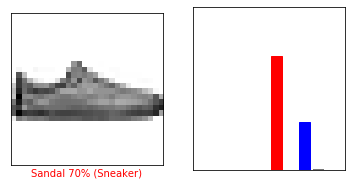

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()